In [96]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Fiche de suivi 


Objectif : Créer un système de recommandation de produits 

Dataset : 
'id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
'reviews.text', 'reviews.title', 'reviews.userCity',
'reviews.userProvince', 'reviews.username'

Méthode : Content Based Filtring  + pondération en fonction du rating des utilisateurs  

Observations : 

- On dispose de plus de nom de produit que d'id de produit, on peux dire qu'il y a donc possibilité d'avoir plusieurs noms pour un même id 

Colonne inutile : 
- reviews id (nan , 111372787.0) une seule ligne possède une valeur
- reviews.userCity rempli de nan uniquement
- reviews.didPurshase rempli de nan à part une seule ligne
- reviews.userProvince rempli de nan uniquement






In [97]:
df = pd.read_csv("1429_1.csv")

df.shape

/var/folders/2f/ysbq8zs16mjfjj4wxl_hz1t80000gn/T/ipykernel_80606/3971873722.py:1: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("1429_1.csv")


(34660, 21)

In [98]:
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [99]:
df.columns

Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],
      dtype='object')

In [100]:
for col in df.columns:
    print(f'{col:-<50} {df[col].unique()} \n shape : {df[col].unique().shape}')

id------------------------------------------------ ['AVqkIhwDv8e3D1O-lebb' 'AVqVGZO3nnc1JgDc3jGK' 'AVpe9CMS1cnluZ0-aoC5'
 'AVpfBEWcilAPnD_xTGb7' 'AVqkIiKWnnc1JgDc3khH' 'AVqkIj9snnc1JgDc3khU'
 'AVsRjfwAU2_QcyX9PHqe' 'AVqVGZNvQMlgsOJE6eUY' 'AVpfwS_CLJeJML43DH5w'
 'AVphgVaX1cnluZ0-DR74' 'AVqVGZN9QMlgsOJE6eUZ' 'AVpftoij1cnluZ0-p5n2'
 'AVqkIhxunnc1JgDc3kg_' 'AVpioXbb1cnluZ0-PImd' 'AVpff7_VilAPnD_xc1E_'
 'AVpjEN4jLJeJML43rpUe' 'AVpg3q4RLJeJML43TxA_' 'AVqVGWLKnnc1JgDc3jF1'
 'AV1YnRtnglJLPUi8IJmV' 'AVphPmHuilAPnD_x3E5h' 'AVzvXXxbvKc47QAVfRhy'
 'AVpe7AsMilAPnD_xQ78G' 'AVph0EeEilAPnD_x9myq' 'AVqkIdntQMlgsOJE6fuB'
 'AVzRlorb-jtxr-f3ygvQ' 'AVqVGWQDv8e3D1O-ldFr' 'AVzvXXwEvKc47QAVfRhx'
 'AVpgdkC8ilAPnD_xsvyi' 'AV1YnR7wglJLPUi8IJmi' 'AVpfl8cLLJeJML43AE3S'
 'AVqkEM34QMlgsOJE6e8q' 'AVzoGHhAglJLPUi8GfzY' 'AVpfIfGA1cnluZ0-emyp'
 'AVphLY7v1cnluZ0-_Ty0' 'AVpf_4sUilAPnD_xlwYV' 'AVpidLjVilAPnD_xEVpI'
 'AVpfpK8KLJeJML43BCuD' 'AVpe8PEVilAPnD_xRYIi' 'AV1YE_muvKc47QAVgpwE'
 'AVpf_znpilAPnD_xlvAF' 'AVpggqsrLJeJML

<Axes: ylabel='count'>

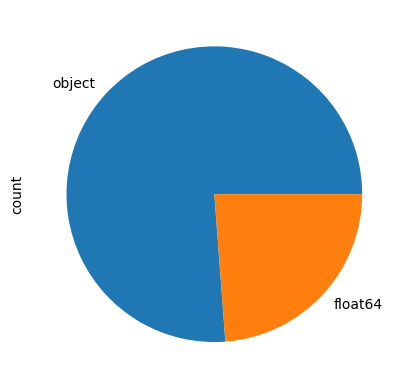

In [101]:
df.dtypes.value_counts().plot.pie()

<Axes: >

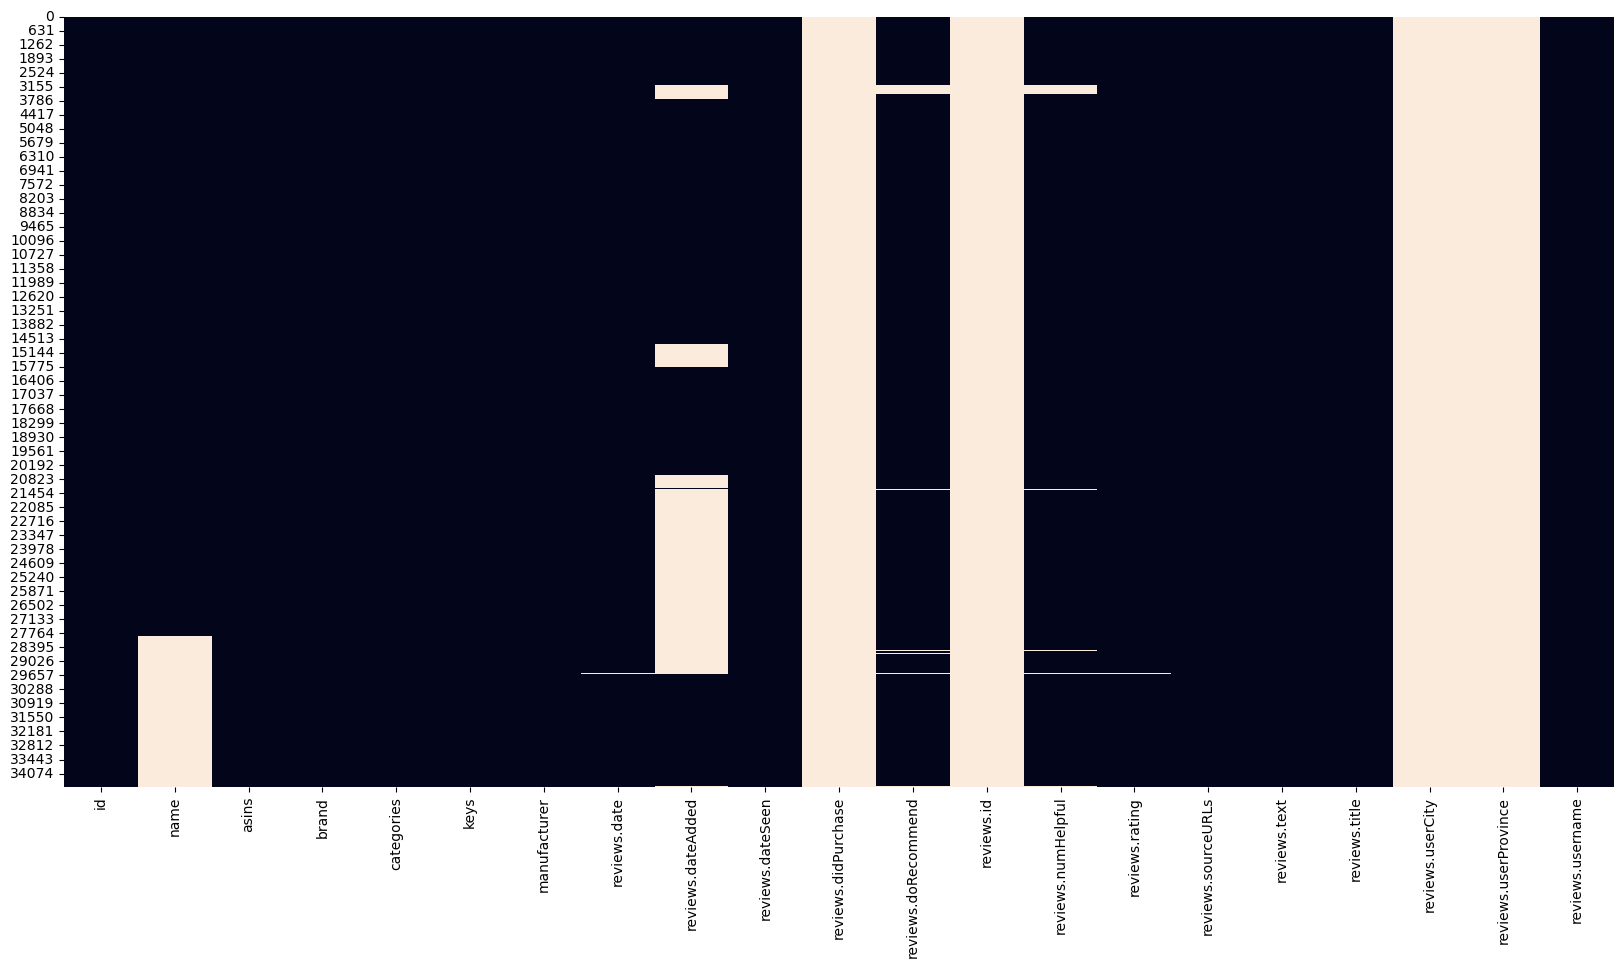

In [102]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)